In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [2]:
dataset = pd.read_csv("log2.csv")

In [3]:
feature_cols = ['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received']

In [4]:
action_values = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}
dataset.Action = [action_values[item] for item in dataset.Action]

In [5]:
# MinMax --> transform features by scaling to a certain range
#Normalization (didn't affect)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit(dataset)

MinMaxScaler()

In [6]:
data = dataset[feature_cols]
target = dataset.Action 

In [7]:
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,1,177,94,83,2,30,1,1
1,56258,3389,56258,3389,1,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,1,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,1,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,1,25358,6778,18580,31,16,13,18


In [8]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=1)

In [9]:
# Bernoulli Naive Bayes
Bernoulli = BernoulliNB()
Bernoulli.fit(X_train, y_train)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [10]:
# Naive Bayes prediction
y_pred = Bernoulli.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

In [11]:
# comparing actual response values (y_test) with predicted response values (y_pred)  --> Bernoulli
print("Accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("F1 score(in %):", metrics.f1_score(y_test, y_pred,average='macro')*100)
print("Percision(in %):", metrics.precision_score(y_test, y_pred,average='macro')*100)
print("Recall(in %):", metrics.recall_score(y_test, y_pred,average='macro')*100)

Accuracy(in %): 99.42013062320699
F1 score(in %): 74.79372360515526
Percision(in %): 74.82397802406963
Recall(in %): 74.76453957435794


In [12]:
# comparing actual response values (y_test) with predicted response values (y_pred)  --> Bernoulli
print("Accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)
print("F1 score(in %):", metrics.f1_score(y_test, y_pred_gnb,average='macro')*100)
print("Percision(in %):", metrics.precision_score(y_test, y_pred_gnb,average='macro')*100)
print("Recall(in %):", metrics.recall_score(y_test, y_pred_gnb,average='macro')*100)

Accuracy(in %): 69.401208569859
F1 score(in %): 63.92692543151348
Percision(in %): 71.40897830500755
Recall(in %): 66.9064895637678


In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)

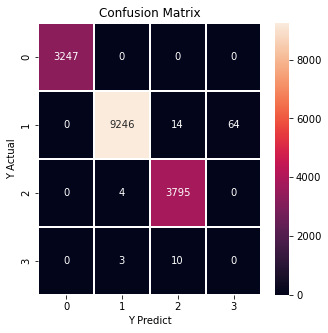

In [14]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.2,fmt=".0f",ax=ax)

plt.title("Confusion Matrix")
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

In [15]:
print("classification report for Bernoulli Naive Bayes")
print(metrics.classification_report(y_test, y_pred))

classification report for Bernoulli Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3247
           1       1.00      0.99      1.00      9324
           2       0.99      1.00      1.00      3799
           3       0.00      0.00      0.00        13

    accuracy                           0.99     16383
   macro avg       0.75      0.75      0.75     16383
weighted avg       1.00      0.99      1.00     16383



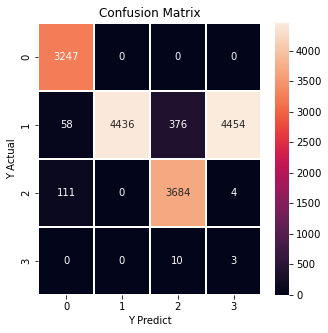

In [16]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_gnb,annot=True,linewidths=0.2,fmt=".0f",ax=ax)

plt.title("Confusion Matrix")
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

In [17]:
print("classification report for Gaussian Naive Bayes")
print(metrics.classification_report(y_test, y_pred_gnb))

classification report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3247
           1       1.00      0.48      0.64      9324
           2       0.91      0.97      0.94      3799
           3       0.00      0.23      0.00        13

    accuracy                           0.69     16383
   macro avg       0.71      0.67      0.64     16383
weighted avg       0.97      0.69      0.78     16383

